# Analysis of market attractiveness and competitive landscape of the education sector in Mexico
 ## Specific asset to be analyzed:  Universidad del Valle de México (UVM)

## 1. Executive Summary

1. The most recent period (2019-2020) indicates that the total number of "New Applicants" and "Enrolled students" in public institutions is larger than in private institutions.
2. However, private institutions are attracting more “New applicants” and “Firs year students” for both onsite and online learning.
3. The private-onsite education is highly concentrated, and Universidad del Valle de México (UVM) remains one of the top players.
4. UVM faces an increasing demand for online learning. Also, the offered places for online learning at UVM has dramatically increased 4 times from the period 2018-2019 to the period 2019-2020. 
5. The latter suggests that **(i) UVM is attracting new applicants for online education, and (ii) UVM demonstrates ability to rapidly adapt to new market trends**. Based on the recent effects of the pandemic COVID-19 on online education, we could expect that **UVM will consolidate as a key player for online education in the forthcoming periods.**

**As a conclusion, is is recommended to purchase the asset.**

## 2. Prepare the Notebook
### Load required libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from toolbox import read_and_process_data

# Other charts will be displayed with plotly, for nice data visualization
import seaborn as sns
import orca
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Connect to my chart_studio account
import chart_studio.plotly as py
py.sign_in('ssalas', 'D1r3FfKaNKi9sjBNyt8t')

# create directories for saving images and processed csv files
import os
if not os.path.exists("images"):
    os.mkdir("images")
if not os.path.exists("files"):
    os.mkdir("files")

### Required libraries for runing the Notebook

In case it is necessary, please install the following libraries. [Source](https://plotly.com/python/)

In [2]:
#pip install chart_studio  # required to display the charts
#pip install plotly # required to display the charts
#pip install -U kaleido
#pip install orca

### Load data and preprocessing

The data was extracted from Asociación de Asociación Nacional de Universidades e Instituciones de Educación Superior [ANUIES](http://www.anuies.mx/informacion-y-servicios/informacion-estadistica-de-educacion-superior/anuario-estadistico-de-educacion-superior) The data comprised several csv datasets that include information about the education landscape in Mexico. The selected periods are:
- 2016-2017
- 2017-2018
- 2018-2019
- 2019-2020

The categories inspected are: 
- Offered places: refers to all available places offered by the Institutions for a given period
- New applicants: this refers to "First Year" applicants for a given period
- New students: also referred to as "First Year" students for a given period
- Enrolled students: refers to all students enrolled in a program for a given period
- Graduate students: refers to all students that have graduated from the program for a given period. This include students that have not received a Diploma
- Graduate with Diploma: refers to all students that have graduated from the program and received a Diploma for a given period


In [3]:
# define a dictionary of terms of the categories 
dict_terms = {"Lugares Ofertados":"Offered_places", 
              "Solicitudes de Primer Ingreso Hombres":"Applications_First_Entry_Male","Solicitudes de Primer Ingreso Mujeres":"Applications_First_Entry_Female", "Solicitudes de Primer Ingreso":"Applications_First_Entry_Total",
              "Primer Ingreso Hombres":"First_Entry_Male", "Primer Ingreso Mujeres": "First_Entry_Female","Primer Ingreso Total":"First_Entry_Total", 
              "Matrícula Hombres":"Enrollment_Male","Matrícula Mujeres":"Enrollment_women","Matrícula Total": "Enrollment_Total", 
              "Egresados Hombres": "All_Graduate_Male","Egresados Mujeres": "All_Graduate_Female","Egresados Total": "All_Graduate",
              "Titulados Hombres": "Graduate_with_Diploma_Male","Titulados Mujeres": "Graduate_with_Diploma_Female","Titulados Total": "Graduate_with_Diploma_Total"}


In [4]:
# Extract databases. df1, df2, df3 correspond to institute_level dataframes
# df01, df02, df03 correspond to program_level dataframes
# onsite data

path="./bases_de_datos/"
filename="Ciclo_2016-2017_Instituciones_Privadas_Escolarizado"
filepath=path+filename+".xlsx"
df1, df01 = read_and_process_data(filepath)
filename="Ciclo_2017-2018_Instituciones_Privadas_Escolarizado"
filepath=path+filename+".xlsx"
df2, df02 = read_and_process_data(filepath)
filename="Ciclo_2018-2019_Instituciones_Privadas_Escolarizado"
filepath=path+filename+".xlsx"
df3, df03 = read_and_process_data(filepath)
filename="Ciclo_2019-2020_Instituciones_Privadas_Escolarizado"
filepath=path+filename+".xlsx"
df4, df04 = read_and_process_data(filepath, last_version=True)

Processing =  ./bases_de_datos/Ciclo_2016-2017_Instituciones_Privadas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (16865, 21)
Dimensions of Institute level dataframe =  (2179, 19)
Dimensions of program level dataframe =  (11816, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2017-2018_Instituciones_Privadas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (17325, 21)
Dimensions of Institute level dataframe =  (2256, 19)
Dimensions of program level dataframe =  (12095, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2018-2019_Instituciones_Privadas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (19786, 21)
Dimensions of Institute level dataframe =  (2562, 19)
Dimensions of program level dataframe =  (13937, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2019-2020_Instituciones_Privadas_Escolarizado.xlsx
Data does no

In [5]:
# online data
path="./bases_de_datos/"
filename="Ciclo_2016-2017_Instituciones_Privadas_No_Escolarizado"
filepath=path+filename+".xlsx"
df1_online, df01_online = read_and_process_data(filepath)
filename="Ciclo_2017-2018_Instituciones_Privadas_No_Escolarizado"
filepath=path+filename+".xlsx"
df2_online, df02_online = read_and_process_data(filepath)
filename="Ciclo_2018-2019_Instituciones_Privadas_No_Escolarizado"
filepath=path+filename+".xlsx"
df3_online, df03_online = read_and_process_data(filepath, skiprows=[0])
filename="Ciclo_2019-2020_Instituciones_Privadas_No_Escolarizado"
filepath=path+filename+".xlsx"
df4_online, df04_online = read_and_process_data(filepath, last_version=True)

Processing =  ./bases_de_datos/Ciclo_2016-2017_Instituciones_Privadas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (5896, 21)
Dimensions of Institute level dataframe =  (937, 19)
Dimensions of program level dataframe =  (3678, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2017-2018_Instituciones_Privadas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (6564, 21)
Dimensions of Institute level dataframe =  (1037, 19)
Dimensions of program level dataframe =  (4118, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2018-2019_Instituciones_Privadas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (8366, 21)
Dimensions of Institute level dataframe =  (1263, 19)
Dimensions of program level dataframe =  (5413, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2019-2020_Instituciones_Privadas_No_Escolarizado.xlsx
Data do

In [6]:
# onsite data
path="./bases_de_datos/"
filename="Ciclo_2016-2017_Instituciones_Publicas_Escolarizado"
filepath=path+filename+".xlsx"
df1_pub, df01_pub = read_and_process_data(filepath)
filename="Ciclo_2017-2018_Instituciones_Publicas_Escolarizado"
filepath=path+filename+".xlsx"
df2_pub, df02_pub = read_and_process_data(filepath)
filename="Ciclo_2018-2019_Instituciones_Publicas_Escolarizado"
filepath=path+filename+".xlsx"
df3_pub, df03_pub = read_and_process_data(filepath)
filename="Ciclo_2019-2020_Instituciones_Publicas_Escolarizado"
filepath=path+filename+".xlsx"
df4_pub, df04_pub = read_and_process_data(filepath, last_version=True)

Processing =  ./bases_de_datos/Ciclo_2016-2017_Instituciones_Publicas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (12836, 21)
Dimensions of Institute level dataframe =  (1267, 19)
Dimensions of program level dataframe =  (8994, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2017-2018_Instituciones_Publicas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (13100, 21)
Dimensions of Institute level dataframe =  (1298, 19)
Dimensions of program level dataframe =  (9187, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2018-2019_Instituciones_Publicas_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (13884, 21)
Dimensions of Institute level dataframe =  (1325, 19)
Dimensions of program level dataframe =  (9881, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2019-2020_Instituciones_Publicas_Escolarizado.xlsx
Data does not c

In [7]:
# online data
path="./bases_de_datos/"
filename="Ciclo_2016-2017_Instituciones_Publicas_No_Escolarizado"
filepath=path+filename+".xlsx"
df1_pub_online, df01_pub_online = read_and_process_data(filepath)
filename="Ciclo_2017-2018_Instituciones_Publicas_No_Escolarizado"
filepath=path+filename+".xlsx"
df2_pub_online, df02_pub_online = read_and_process_data(filepath)
filename="Ciclo_2018-2019_Instituciones_Publicas_No_Escolarizado"
filepath=path+filename+".xlsx"
df3_pub_online, df03_pub_online = read_and_process_data(filepath)
filename="Ciclo_2019-2020_Instituciones_Publicas_No_Escolarizado"
filepath=path+filename+".xlsx"
df4_pub_online, df04_pub_online = read_and_process_data(filepath, last_version=True)

Processing =  ./bases_de_datos/Ciclo_2016-2017_Instituciones_Publicas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (1903, 21)
Dimensions of Institute level dataframe =  (317, 19)
Dimensions of program level dataframe =  (961, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2017-2018_Instituciones_Publicas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (2018, 21)
Dimensions of Institute level dataframe =  (334, 19)
Dimensions of program level dataframe =  (1025, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2018-2019_Instituciones_Publicas_No_Escolarizado.xlsx
Data does not contain missing values.
Dimensions of raw  dataframe =  (2219, 21)
Dimensions of Institute level dataframe =  (351, 19)
Dimensions of program level dataframe =  (1178, 21)
******* done *********
Processing =  ./bases_de_datos/Ciclo_2019-2020_Instituciones_Publicas_No_Escolarizado.xlsx
Data does 

#### Validate 2016-2017 version

According to ANNUIES web page, version 2016-2017 of SEP incorrectly classified some institutes as "private". 
The following institutes were checked if they were not classified incorrectly (as "private") in the ANNUIES version:

- “Centro de Actualización del Magisterio” of Chiapas.
- “Facultad Latinoamericana de Ciencias Sociales” (FLACSO) of Mexico city.
- “Centro de Capacitación en Ciencias Forenses” of Jalisco.
- “Instituto Mexiquense de Seguridad y Justicia, Plantel de Formación y Actualización” of the State of Mexico
- “Centro de Capacitación del Instituto Estatal Electoral de Nayarit” of Jalisco

In [8]:
#df1['State'].unique() # print name of states
#df1[(df1['State']=="CHIAPAS") & (df1['Name'].str.startswith("CENTRO DE"))]  # alternative option
df1[(df1['State']=="CHIAPAS") & (df1['Institute']=="CENTRO DE ACTUALIZACION DEL MAGISTERIO")]
df1[df1['Institute']=="FACULTAD LATINOAMERICANAS DE CIENCIAS SOCIALES"]
df1[(df1['State']=="JALISCO") & (df1['Institute']=="CENTRO DE CAPACITACIÓN EN CIENCAS FORENSES")]
df1[(df1['State']=="MÉXICO") & (df1['Institute']=="CENTRO DE CAPACITACIÓN EN CIENCAS FORENSES")]
df1[(df1['State']=="JALISCO") & (df1['Institute']=="CENTRO DE CAPACITACIÓN DEL INSTITUTO ELECTORAL DE NAYARIT")]

,State,Municipality,Institute,Offered_places,Applications_First_Entry_Male,Applications_First_Entry_Female,Applications_First_Entry_Total,First_Entry_Male,First_Entry_Female,First_Entry_Total,Enrollment_Male,Enrollment_women,Enrollment_Total,All_Graduate_Male,All_Graduate_Female,All_Graduate,Graduate_with_Diploma_Male,Graduate_with_Diploma_Female,Graduate_with_Diploma_Total


### Merge all datasets into a single one

In [9]:
#define function to add count, period and modality to dataframe
def process_df(df, period, modality):
    df['Count'] = 1
    df['period'] = period
    df['modality'] = modality
    return df
# append dataframes one by one
def append_df(dfs_init, dfs, periods, modality, length_counter):
    for idx in range(len(dfs)):
        new_df = process_df(dfs[idx], periods[idx], modality=modality)
        dfs_init=dfs_init.append(new_df, ignore_index=True)
        length_counter += len(new_df)
    #print(length_counter) # use this to validate size
    return dfs_init


# append private onsite
dfs_init = process_df(df1, period="2016-2017", modality="private-onsite")
dfs_all_private_onsite = append_df(dfs_init, dfs=[df2,df3,df4], periods=["2017-2018","2018-2019","2019-2020"], modality="private-onsite",length_counter=len(dfs_init))
# append private online
dfs_init2 = dfs_all_private_onsite
dfs_all_private = append_df(dfs_init2, dfs=[df1_online,df2_online,df3_online,df4_online], periods=["2016-2017","2017-2018","2018-2019","2019-2020"], modality="private-online",length_counter=len(dfs_init2))
# append public onsite
dfs_init3 = dfs_all_private
dfs_all = append_df(dfs_init3, dfs=[df1_pub,df2_pub,df3_pub,df4_pub], periods=["2016-2017","2017-2018","2018-2019","2019-2020"], modality="public-onsite",length_counter=len(dfs_init3))
# append public online
dfs_init4 = dfs_all
dfs_all = append_df(dfs_init4, dfs=[df1_pub_online,df2_pub_online,df3_pub_online,df4_pub_online], periods=["2016-2017","2017-2018","2018-2019","2019-2020"], modality="public-online",length_counter=len(dfs_init4))
# Write csv. Store information for use in other projects or Notebooks
dfs_all.to_csv('./files/complete_data.csv',index=False)

## 3. Analysis

### Total students by type of institutions (2019-2020)

The following graph displays the total number of students for the period 2019-2020, by category. Overall, more students study in public institutions than in private institutions. The population of "New applicants" and "Enrolled students" in public institutions is double than in private institutions.  

In [10]:
from graphs import graph1
graph1(df4, df4_pub, df4_online, df4_pub_online)

### Total students in private institutions (onsite and online modalities)

If we look at the total number of students by category in private institutions, over the four periods that are been analyzed, we can see that the category "Enrolled students" has an upward trend, especially for the last two periods. We can say the same for "New applicants" and "New students" (first year students). 

In [11]:
from graphs import graph2
graph2(df1, df1_online, df2, df2_online, df3, df3_online, df4, df4_online)

### Change of new applications and new students by type of institution and modality (onsite and online)

"New applicants" and "New students" (first year students) are useful categories; they can give us an idea of how much the market is growing and what could we expect for the forthcoming periods. The graph below tells us that the number of "New Applicants" and "New students" in **private institutions** has been constantly growing for the past four periods. 

In [12]:
from graphs import graph3
graph3(df1,df1_online,df2,df2_online,df3,df3_online,df4,df4_online,df1_pub,df1_pub_online,df2_pub,df2_pub_online,df3_pub,df3_pub_online,df4_pub,df4_pub_online)


### Change of new applications and new students by type of institution (onsite modality)

If we look at the same data as below, but only for **onsite education**, there is a clear increasing trend in both private and public institutions.

In [13]:
from graphs import graph4
graph4(df1,df2,df3,df4,df1_pub,df2_pub,df3_pub,df4_pub)

### Change of new applications and new students by type of institution (online modality)

However, by looking at the same information as below, but only for **online education**, private institutions seem to report an increasing trend, while public institutions have diverging trends. In other words, **private institutions are atracting more and more new applicants and new students.**

In [14]:
from graphs import graph5
graph5(df1_online,df2_online,df3_online,df4_online,df1_pub_online,df2_pub_online,df3_pub_online,df4_pub_online)

### Total students on private institutions in onsite and online modalities (2016-2017 and 2019-2020)¶

Now let's dive into private education. Online-private education remains lower than onsite-private education: the total number of students enrolled in onsite-private education is 2 times larger than the total number of students enrolled in online-private education. 

Nonetheless, the number of **"Enrolled students" in private-online education** has grew 85% between 2016-2017 and 2019-2020, whereas the number of "Enrolled students" in private-onsite education grew 23% for the same period.


In [17]:
from graphs import graph6
graph6(df1,df1_online,df4,df4_online)

Enrolled students in private-onsite education grew = 23.5%
Enrolled students in private-online education grew = 85.2%


## 2. Analysis of the Asset's trends

Let's dive into the characteristics of the Asset UVM.

In [19]:
# filter UVM from complete dataframe
dfs_UVM_final = dfs_all[dfs_all['Institute']=="UNIVERSIDAD DEL VALLE DE MÉXICO"]

# Write csv. Store information for use in other projects or Notebooks
dfs_UVM_final.to_csv('./files/complete_data_UVM.csv',index=False)

In [20]:
# UVM is a private institution
# Corrobrate UVM is not in any public-Insitute dataset
dfs = [df1_pub,df2_pub,df3_pub,df4_pub,df1_pub_online,df2_pub_online,df3_pub_online,df4_pub_online]
for idx in range(len(dfs)):
    if len(dfs[idx][(dfs[idx]['Institute']=="UNIVERSIDAD DEL VALLE DE MÉXICO")]) !=0:
        print(dfs[idx][(dfs[idx]['Institute']=="UNIVERSIDAD DEL VALLE DE MÉXICO")])
    else:
        print("UVM institute not in this dataset.")

UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.
UVM institute not in this dataset.


In [21]:
# Display info
#dfs_UVM_final.info()

In [22]:
# check description
dfs_UVM_final.describe()

,Offered_places,Applications_First_Entry_Male,Applications_First_Entry_Female,Applications_First_Entry_Total,First_Entry_Male,First_Entry_Female,First_Entry_Total,Enrollment_Male,Enrollment_women,Enrollment_Total,All_Graduate_Male,All_Graduate_Female,All_Graduate,Graduate_with_Diploma_Male,Graduate_with_Diploma_Female,Graduate_with_Diploma_Total,Count
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,386.515152,195.632576,197.015152,392.647727,152.765152,150.314394,303.079545,526.939394,541.386364,1068.325758,80.348485,90.227273,170.575758,55.231061,63.087121,118.318182,1.0
std,962.927855,449.189762,487.971669,934.234735,381.728774,421.103705,800.276429,694.250788,734.291279,1420.135700,90.299248,103.393493,191.385408,65.834246,75.299680,139.396653,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50.000000,21.750000,23.000000,46.000000,20.500000,21.000000,40.000000,97.000000,84.500000,180.000000,19.000000,16.750000,41.250000,11.000000,12.000000,23.000000,1.0
50%,178.000000,81.000000,76.500000,152.500000,69.500000,67.000000,139.000000,293.500000,283.500000,623.000000,48.500000,57.000000,100.500000,33.500000,34.500000,72.000000,1.0
75%,435.750000,213.000000,202.000000,398.250000,173.250000,163.250000,337.750000,691.250000,685.000000,1363.750000,109.250000,119.000000,225.250000,75.000000,82.500000,162.250000,1.0
max,14037.000000,5640.000000,6437.000000,12077.000000,5639.000000,6437.000000,12076.000000,6534.000000,7276.000000,13810.000000,455.000000,549.000000,985.000000,366.000000,393.000000,757.000000,1.0


### Number of institutions and offered places

The first aspect that stands out is that the number of UVM institutions has increased over the four selected periods. In 2016-2017, UVM had 64 institutions in total and offered around 21,000 places. By contrast, in the period 2019-2020, UVM has 70 institutions and offers around 32,000 places. 

In [23]:
# number of institutions has been increasing
UVM_by_period = dfs_UVM_final.groupby('period').sum()
UVM_by_period[['Count','Offered_places']].rename(columns={"Count":"Num. of institutes","Offered_places":"Offered places"}) #.pct_change().fillna(0)*100

,Num. of institutes,Offered places
period,,
2016-2017,64,21358.0
2017-2018,64,27331.0
2018-2019,66,21306.0
2019-2020,70,32045.0


### Total students in UVM by category and by modality (2019-2020)

For the period of 2019-2020, the total number of "Enrolled" students in onsite programs is larger than in online programs. Noneheless, **the total number of "First year" students in online programs is larger than in onsite programs**. Also, the number of "New Applicants" (here indicated as "Applications") in online programs is almost as large as in onsite programs.


In [24]:
from graphs import graph7
graph7(dfs_UVM_final)

### Distribution of students by category and by modality (2016-2017)

To understand online vs onsite dynamics at UVM, let's compare the distribution of students by category. In 2016-2017, onsite programs attracted more people. Whereas, in 2019-2020 (chart below), the proportion of students in online programs grew in each category.

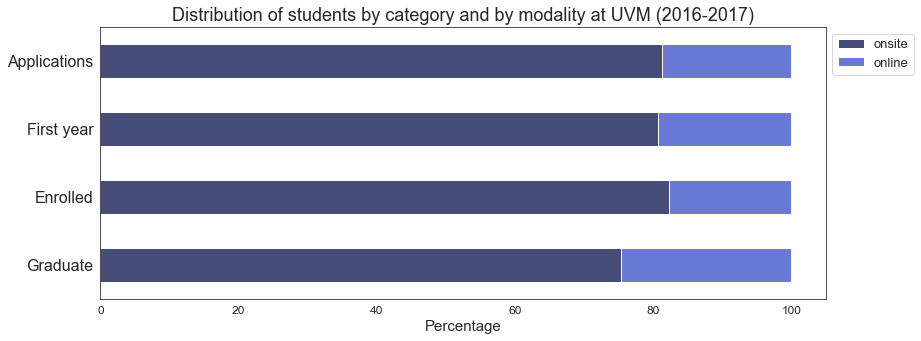

In [25]:
from graphs import graph9
distribution_prev = graph9(dfs_UVM_final)

In [26]:
distribution_prev

modality,onsite,online
Applications,81.230928,18.769072
First year,80.737470,19.262530
Enrolled,82.353659,17.646341
Graduate,75.412794,24.587206


### Distribution of students by category and by modality (2019-2020)

It is worth noting that the proportion of Firt Year students in online programs is larger than in onsite programs. And it seems the proportion of students in online programs is growing in the rest of the categories ("Applications", "Enrolled", and "Graduate").

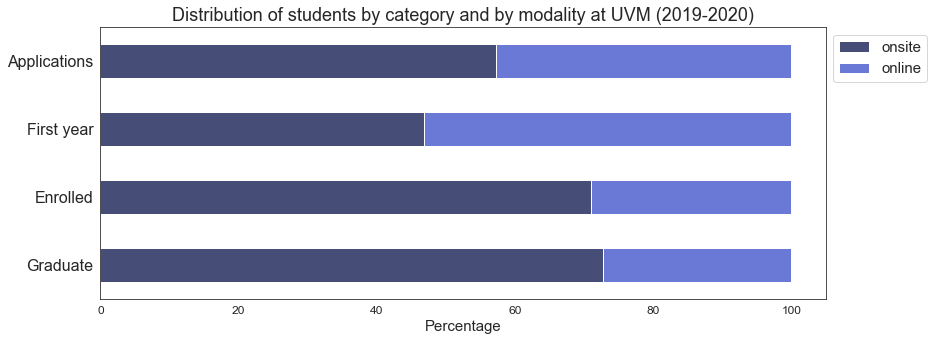

In [27]:
from graphs import graph8
distribution_last = graph8(dfs_UVM_final)

In [28]:
distribution_last

modality,onsite,online
Applications,57.262661,42.737339
First year,46.889792,53.110208
Enrolled,71.057402,28.942598
Graduate,72.792558,27.207442


### Applications as a percentage of offered places by modalities (onsite and online)


The following graph displays the percentage of total offered places at UVM in onsite and online modalities. This can be considered a useful indicator that tells us how much attractiveness the university has among the target population (young people applying to university programs). 

In the first two periods (2016-2017 and 2017-2018), the number of applications received were less than the offered places. But, in the period 2018-2019, the number of applicants surpassed the total number of offered places in both modalities (onsite and online). 

In the last period (2019-2020), the total of applications remains once more below the total of offered places in online education. The reason is that the number of offered places for online studying incremented dramatically. 

In [29]:
from graphs import graph10
graph10(dfs_UVM_final)

### Offered places in online and onsite modalities at UVM (from 2016-2017 to 2019-2020)

The number of offered places for online studying grew 4 times from the period 2018-2019 to the period 2019-2020. The latter suggests two things: 

1. UVM is attracting new applicants for online education.
2. UVM has the ability to rapidly adapt to new market trends. Specifically, it has adapted to the surge on the demand for online learning.

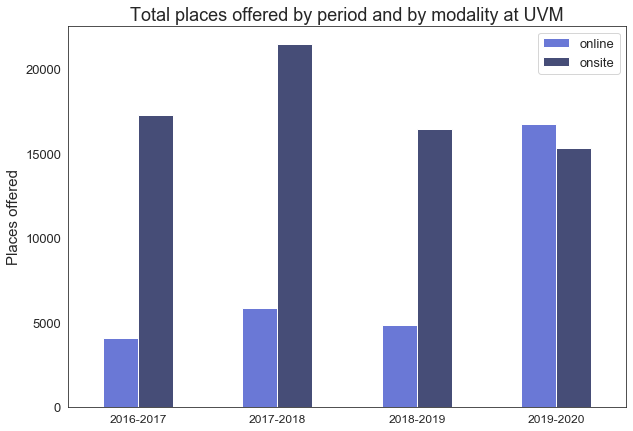

In [30]:
from graphs import graph11
graph11(dfs_UVM_final)

### Change of enrollment at UVM by state (2016-2017 vs 2019-2020)

The number of "Enrolled" students at UVM has mostly increased in Mexico City, Nuevo Leon, Tamaulipas, Tabasco, and Chihuahua. On the other hand, its market is shrinking particularly in Coahuila, Jalisco, Caja California, Morelos.

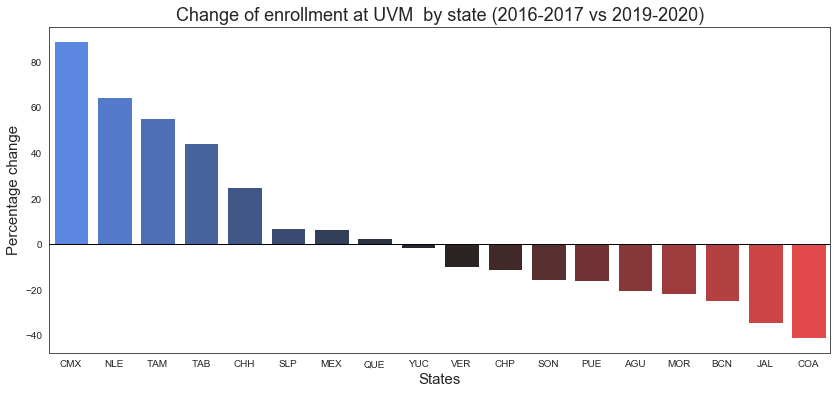

In [31]:
# enrollment by state: change between 2016-2017 and 2019-2020
from graphs import graph10b
df_geographic_scope = graph10b(dfs_UVM_final)

### Applications as a percentage of offered places at UVM (2019-2020)

For the period 2019-2020, the State of Mexico, Veracruz, Tamaulipas, Queretaro, and Chiapas have a larger number of applicants than places offered by the University in each region. Chihuahua, Sonora, and Puebla also registered a high number of applications. In these regions we could expect an expansion of the University, specially in Chihuahua and Tamaulipas (where the number of "Enrolled students" has rapidly increased as pointed by the previous graph).

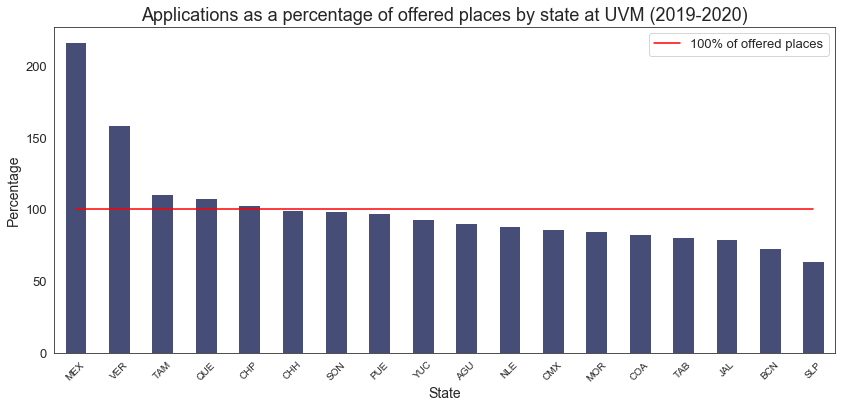

In [32]:
# applications as percentage of offered places by state in 2019-2020
from graphs import graph10c
graph10c(dfs_UVM_final)

## 3. Key players ot the market and top competitors of UVM for the period 2019-2020

The following criteria was used for selecting key players of the market:
1. **"Enrolled" students**. This criterion tells us about the size of the institutions in the country. 

*Threshold: >2% of "Enrolled" students.* A player was considered top if it contributed with more than 2% to the total number of enrolled students for the selected period.

2. **Number of "New Applications"**. This criterion tells us about the attractiveness of the institutions for the target population. 

*Threshold: top 15.* The 15 institutions with the largest number of applications in the selected period were considered.

Once the key players were identified (based on the previous criteria), the competitors of UVM were selected according to the number of programs/careers similar to the programs/careers offer by UVM. The five competitors with the largest number of similar programs/careers with UVM, were selected. **With this method, it was possible to the identify: (1) the most relevant competitors in the market (based on size and attractiveness), and (2) the closest competitors of UVM.**

### Enrolled students in private institutes by modality (2019-2020)

The **private-onsite education market** is highly concentrated: there are four key players: 
- UNITEC (1st place) has 5% of the total number of enrolled students in Mexico, followed by UVM with 4.6%
- The four players account for 17% of the market

The **private-online education market** is more competitive: there are eight key players. 
- UNID (1st place) has 4.7% of the total number of enrolled students in Mexico, while UVM (fourth place) has 4%
- The eight players account for 29% of the market


In [33]:
# define lists of copmetitors
competitors_onsite = []
competitors_online = []

In [34]:
from graphs import graph12
g12, competitors_onsite, competitors_online = graph12(dfs_all, competitors_onsite, competitors_online)
g12

Total players in onsite learning in 2019-2020 =  2063
Total players in online learning in 2019-2020 =  1119


In [35]:
competitors_onsite

['UNIVERSIDAD TECNOLÓGICA DE MÉXICO',
 'UNIVERSIDAD DEL VALLE DE MÉXICO',
 'INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY']

In [36]:
competitors_onsite

['UNIVERSIDAD TECNOLÓGICA DE MÉXICO',
 'UNIVERSIDAD DEL VALLE DE MÉXICO',
 'INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY']

### Private institutions with the highest number of applications in 2019-2020 (onsite modality)

UVM is the second institution in Mexico that has largest number of new applications for onsite modality for the selected period.

In [37]:
from graphs import graph13
g13, competitors_onsite = graph13(dfs_all, competitors_onsite)
g13

### Private institutions with the highest number of applications in 2019-2020 (online modality)

UVM is the institution in Mexico with the largest number of new applications for online modality for the selected period.

In [38]:
from graphs import graph14
g14, competitors_online = graph14(dfs_all, competitors_online)
g14

### Similarity of programs/careers between UVM and other key players

In [39]:
# remove UVM
competitors_onsite.remove('UNIVERSIDAD DEL VALLE DE MÉXICO')
competitors_online.remove('UNIVERSIDAD DEL VALLE DE MÉXICO')

In [40]:
# similarity - onsite education
UVM_programs = df04[df04['Institute']=='UNIVERSIDAD DEL VALLE DE MÉXICO']['Program'].unique().tolist()
similarity_grade = {}
competitors_onsite
for idx in range(len(competitors_onsite)):
    name=competitors_onsite[idx]
    programs = df04[df04['Institute']==name]['Program'].unique().tolist()
    common_careers = [p for p in programs if p in UVM_programs]
    similarity_grade[name]=len(common_careers)
onsite_similarity = pd.DataFrame.from_dict(similarity_grade,orient='index').rename(columns={0:"onsite_2019-2020"}).sort_values('onsite_2019-2020',ascending=False)
onsite_similarity

,onsite_2019-2020
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,33
UNIVERSIDAD ANÁHUAC,33
UNIVERSIDAD POPULAR AUTÓNOMA DEL ESTADO DE PUEBLA,27
INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY,26
UNIVERSIDAD AUTÓNOMA DE GUADALAJARA,24
UNIVERSIDAD AUTÓNOMA DE DURANGO A.C.,20
UNIVERSIDAD VIZCAYA DE LAS AMÉRICAS,16
UNIVERSIDAD DE MONTERREY,15
UNIVERSIDAD UNIVER,15
UNIVERSIDAD PANAMERICANA,15


In [41]:
# similarity - online education
UVM_programs = df04_online[df04_online['Institute']=='UNIVERSIDAD DEL VALLE DE MÉXICO']['Program'].unique().tolist()
similarity_grade = {}
competitors_online
for idx in range(len(competitors_online)):
    name=competitors_online[idx]
    programs = df04_online[df04_online['Institute']==name]['Program'].unique().tolist()
    common_careers = [p for p in programs if p in UVM_programs]
    similarity_grade[name]=len(common_careers)
online_similarity = pd.DataFrame.from_dict(similarity_grade,orient='index').rename(columns={0:"online_2019-2020"}).sort_values('online_2019-2020',ascending=False)
online_similarity

,online_2019-2020
"ENSEÑANZA E INVESTIGACIÓN SUPERIOR, A.C.",9
UNIVERSIDAD TECNOLÓGICA LATINOAMERICANA EN LÍNEA,9
"UNIVERSIDAD LATINOAMERICANA, S.C.",9
UNIVERSIDAD INTERAMERICANA PARA EL DESARROLLO,7
"INSTITUTO DE ESTUDIOS UNIVERSITARIOS, A.C.",7
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,6
UNIVERSIDAD DE LOS ÁNGELES,5
UNIVERSIDAD TANGAMANGA,5
UNIVERSIDAD CNCI,4
UNIVERSIDAD VALLE DEL GRIJALVA,4


In [42]:
final_onsite_competitors = onsite_similarity[:5].index.tolist()#.append('UNIVERSIDAD DEL VALLE DE MÉXICO')
final_online_competitors = online_similarity[:5].index.tolist()#.append('UNIVERSIDAD DEL VALLE DE MÉXICO')
final_onsite_competitors.append('UNIVERSIDAD DEL VALLE DE MÉXICO')
final_online_competitors.append('UNIVERSIDAD DEL VALLE DE MÉXICO')  

### How does UVM performs with respect to its closest onsite competitors in 2019-2020?

In 2019-2020, UVM had the third largest number of "New Applicants" (here indicated as "First entry") in the onsite modality. However, the number of "New Applicants" has decreased when comparing this period with respect to the 2016-2017.

In the case of "Enrollment", in 2019-2020 UVM had the second largest number of "Enrolled" students in the onsite modality. However, UVM has reported the least increment of this category among its competitors between this period and 2016-2017.

In [43]:
final_onsite_competitors

['UNIVERSIDAD TECNOLÓGICA DE MÉXICO',
 'UNIVERSIDAD ANÁHUAC',
 'UNIVERSIDAD POPULAR AUTÓNOMA DEL ESTADO DE PUEBLA',
 'INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY',
 'UNIVERSIDAD AUTÓNOMA DE GUADALAJARA',
 'UNIVERSIDAD DEL VALLE DE MÉXICO']

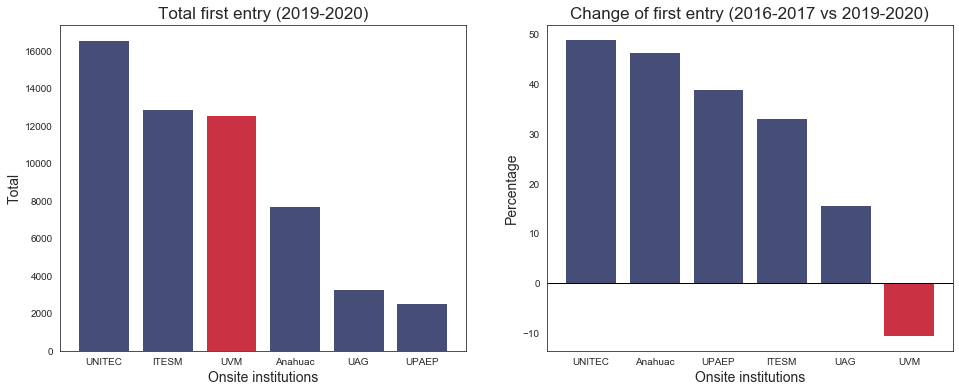

In [44]:
from graphs import graph15
graph15(dfs_all, final_onsite_competitors)

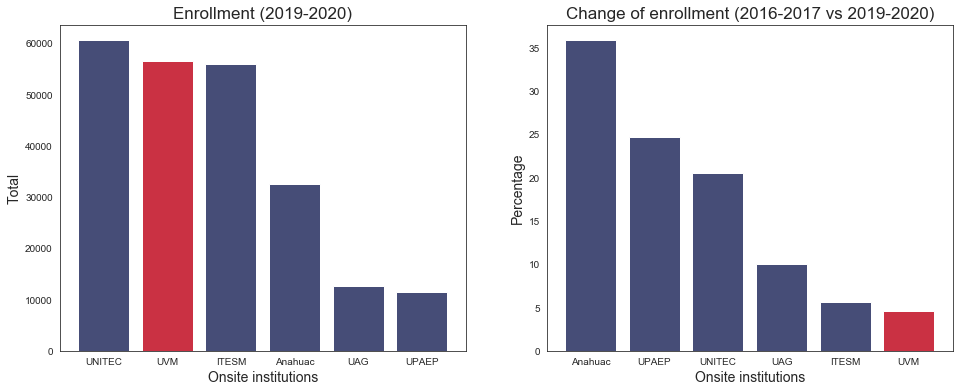

In [45]:
from graphs import graph16
graph16(dfs_all, final_onsite_competitors)

### How does UVM performs with respect to its closest online competitors in 2019-2020?

In 2019-2020, UVM had the **largest number of "New Applicants"** (here indicated as "First entry") in the online modality, a trend that is increasing as indicated by the percentage change between 2019-2020 and 2016-2017.

In the case of "Enrollment", UVM is also a key player among its competitors. It reports an increasing trend of "Enrolled" students in the online modality.

In [46]:
final_online_competitors

['ENSEÑANZA E INVESTIGACIÓN SUPERIOR, A.C.',
 'UNIVERSIDAD TECNOLÓGICA LATINOAMERICANA EN LÍNEA',
 'UNIVERSIDAD LATINOAMERICANA, S.C.',
 'UNIVERSIDAD INTERAMERICANA PARA EL DESARROLLO',
 'INSTITUTO DE ESTUDIOS UNIVERSITARIOS, A.C.',
 'UNIVERSIDAD DEL VALLE DE MÉXICO']

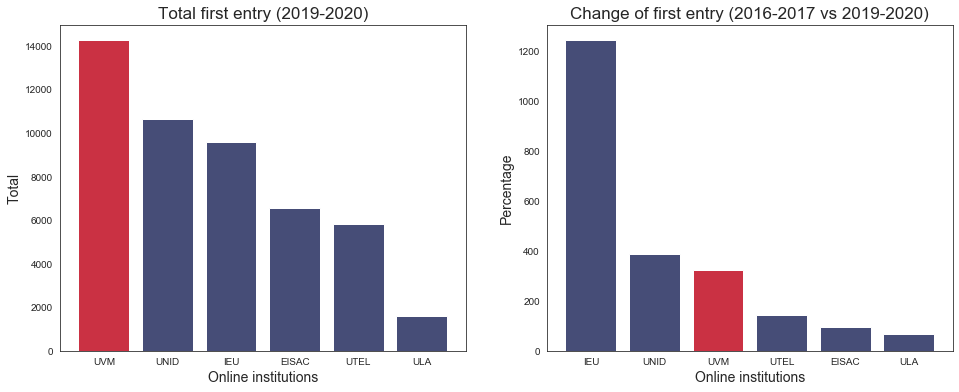

In [47]:
from graphs import graph17
graph17(dfs_all, final_online_competitors)

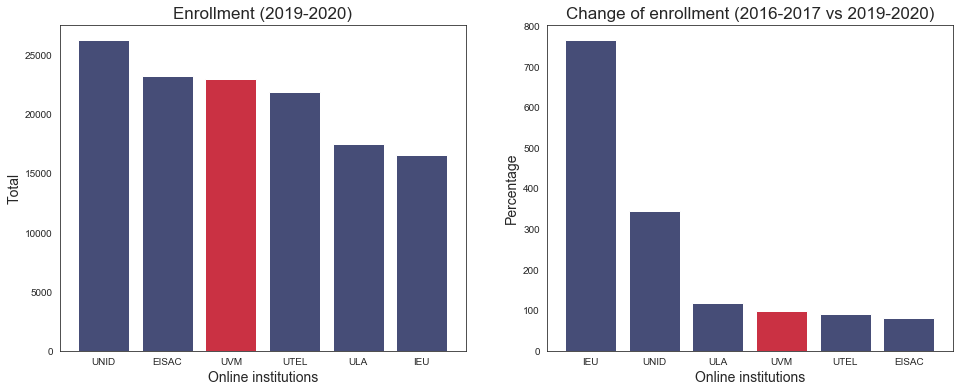

In [48]:
from graphs import graph18
graph18(dfs_all, final_online_competitors)